# Gokul Raja R
# Data Science Intern

# Task 3

# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
pd.set_option('display.max_columns', None)

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# EDA

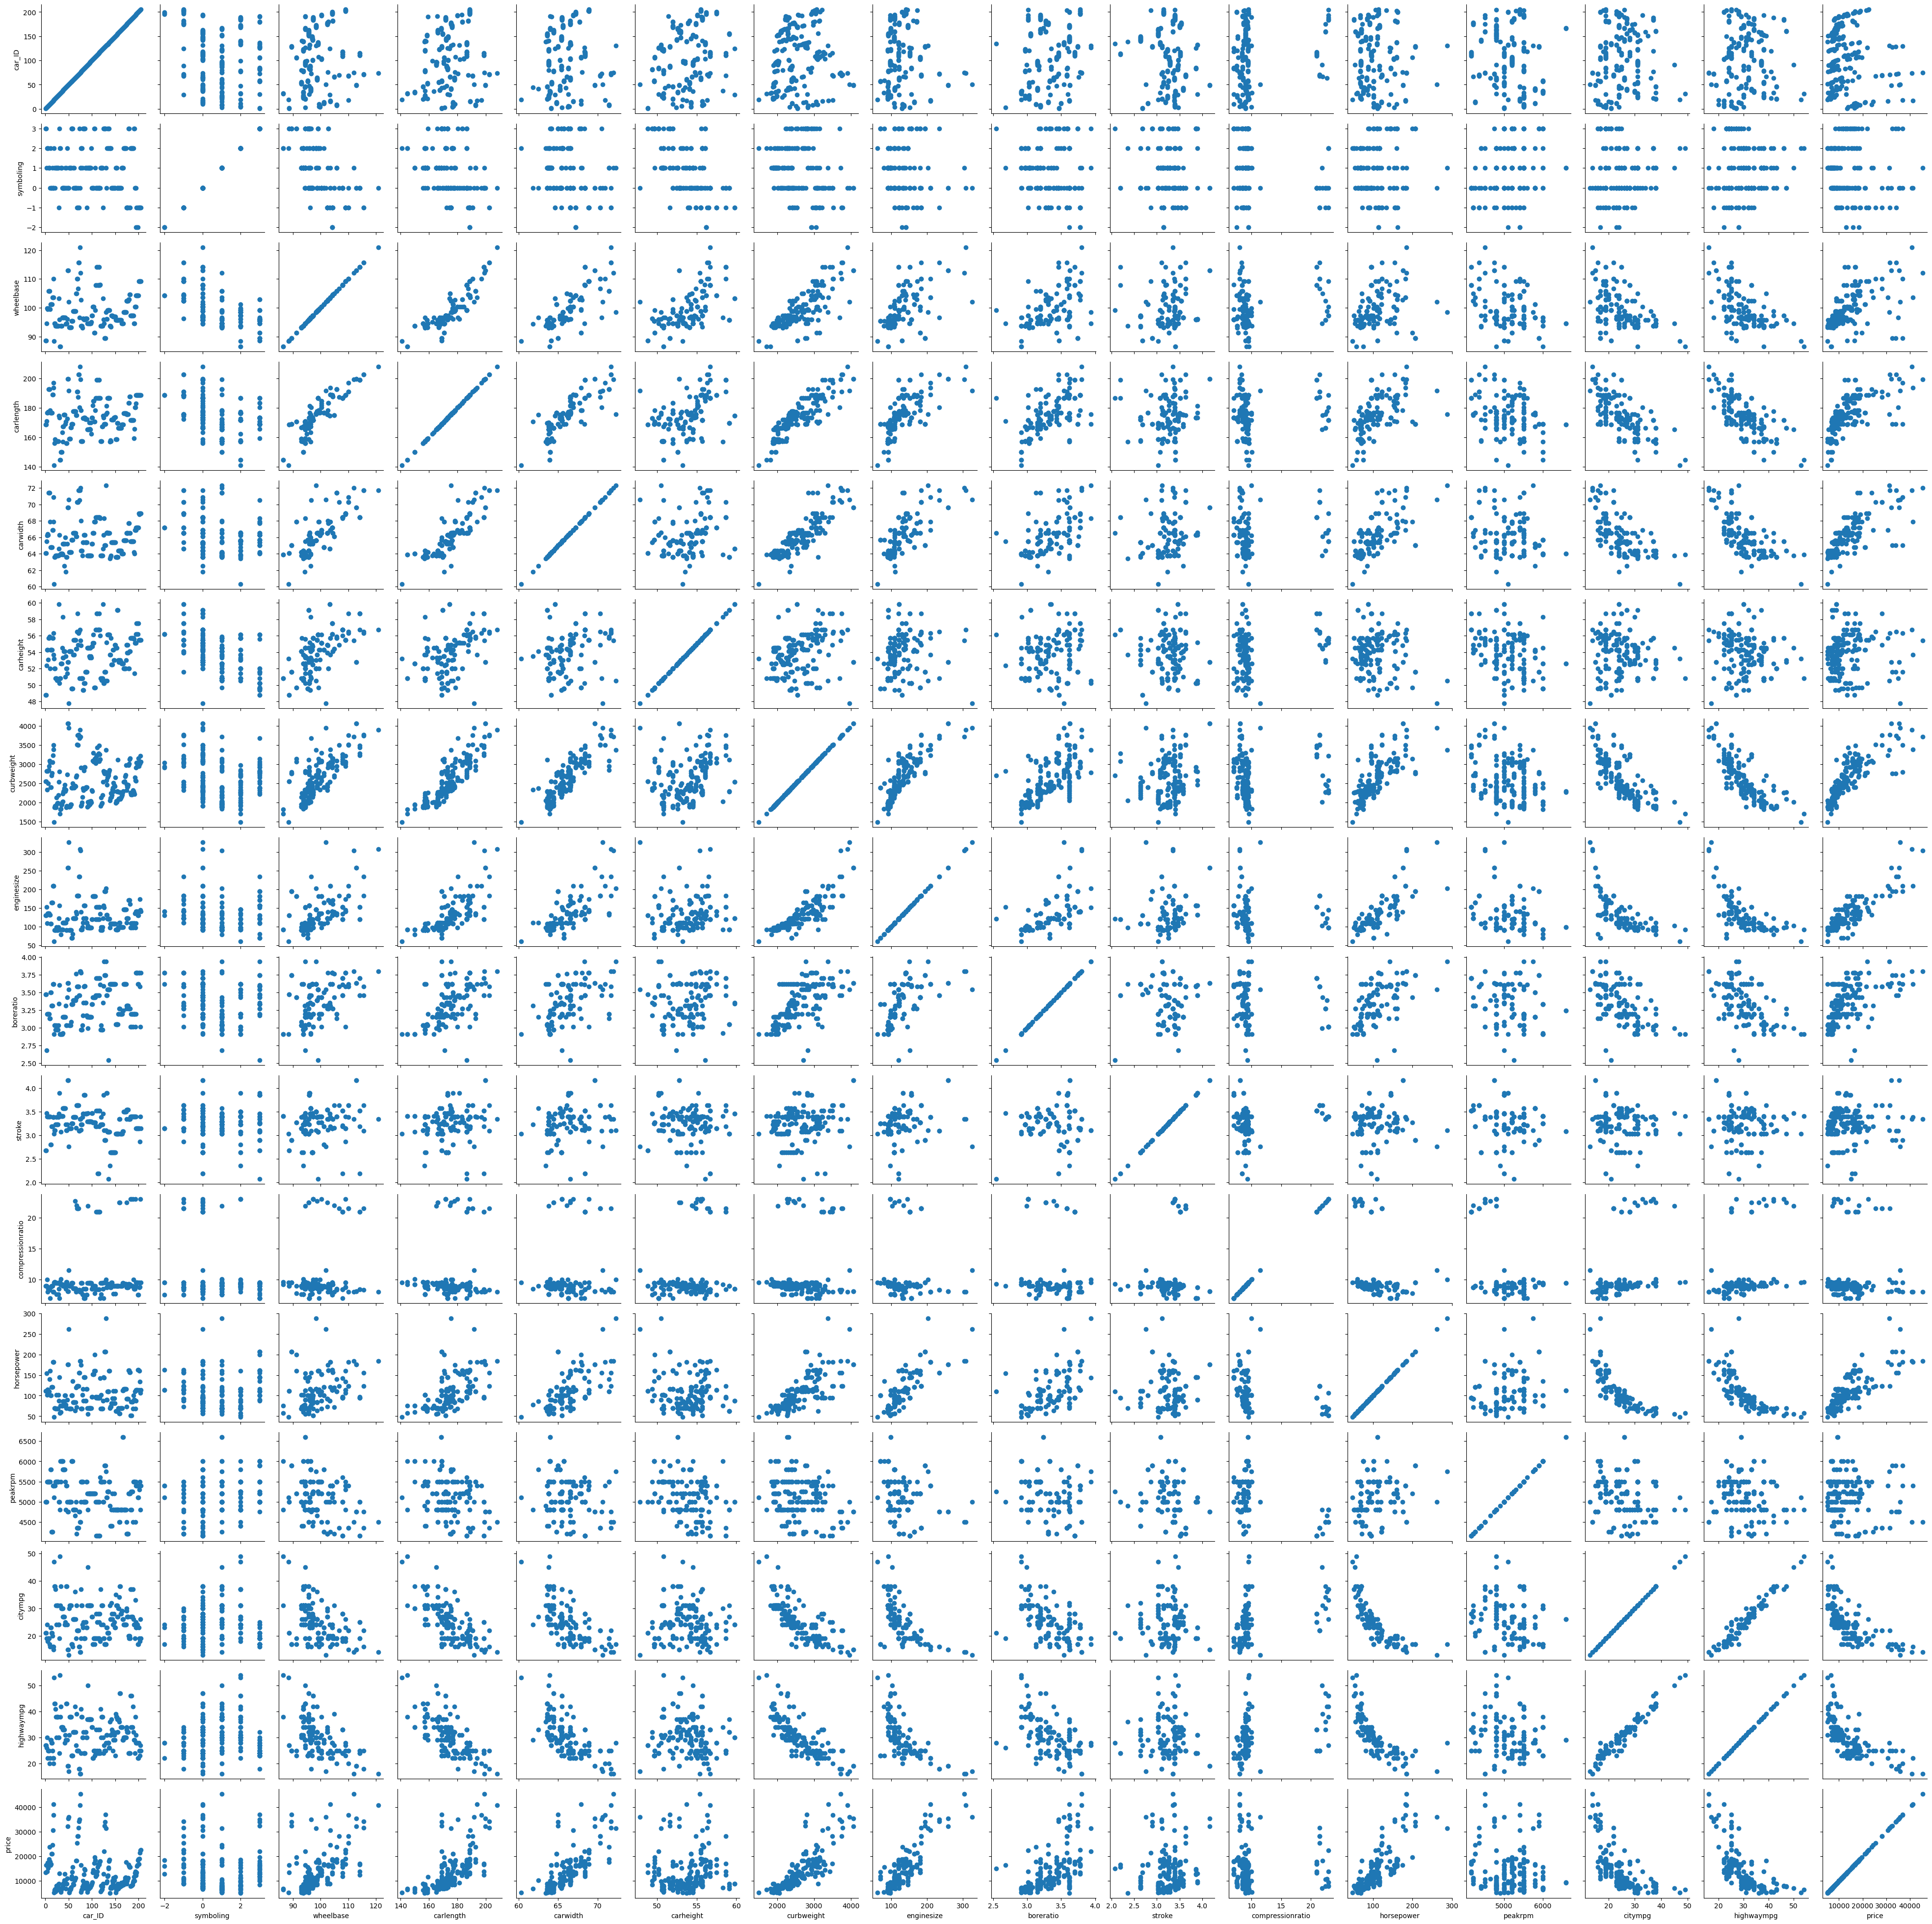

In [4]:
f = sns.PairGrid(data)
f.map(plt.scatter)

In [5]:
data = data.drop(columns = ['car_ID', 'CarName'], axis = 1)

In [6]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Feature Engineering

In [8]:
data["symboling"] = data["symboling"].apply(lambda x: 1 if x > 0 else 0 if x < 1 else x)

In [9]:
f = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
for i in f:
    print(i, "----",data[i].unique(),"\n")

fueltype ---- ['gas' 'diesel'] 

aspiration ---- ['std' 'turbo'] 

doornumber ---- ['two' 'four'] 

enginelocation ---- ['front' 'rear'] 



In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
f = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
for i in f:
    data[i] = cv.fit_transform(data[i]).toarray()

In [11]:
col =[ 'carbody',
       'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem']
for i in col:
    print(i, "----",data[i].unique(),"\n")

carbody ---- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drivewheel ---- ['rwd' 'fwd' '4wd'] 

enginetype ---- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 

cylindernumber ---- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] 

fuelsystem ---- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 



In [12]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0,0,0,1,sedan,rwd,1,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0,0,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,1,0,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
import category_encoders as ce
encoder = ce.CountEncoder()
cols = ['carbody','drivewheel', 'enginetype','fuelsystem']
for i in cols:
    data[i] = encoder.fit_transform(data[i])

In [16]:
data["cylindernumber"] = data["cylindernumber"].replace({'four' : 3, 'six' : 5, 'five' : 4, 'three' : 2, 'twelve' : 7 , 'two' : 1, 'eight' : 6})

In [17]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,6,76,1,88.6,168.8,64.1,48.8,2548,12,3,130,94,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,6,76,1,88.6,168.8,64.1,48.8,2548,12,3,130,94,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,0,70,76,1,94.5,171.2,65.5,52.4,2823,13,5,152,94,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,1,1,96,120,1,99.8,176.6,66.2,54.3,2337,148,3,109,94,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,1,1,96,9,1,99.4,176.6,66.4,54.3,2824,148,4,136,94,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,1,96,76,1,109.1,188.8,68.9,55.5,2952,148,3,141,94,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0,0,0,1,96,76,1,109.1,188.8,68.8,55.5,3049,148,3,141,94,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0,0,1,1,96,76,1,109.1,188.8,68.9,55.5,3012,13,5,173,94,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,1,0,1,96,76,1,109.1,188.8,68.9,55.5,3217,148,5,145,20,3.01,3.40,23.0,106,4800,26,27,22470.0


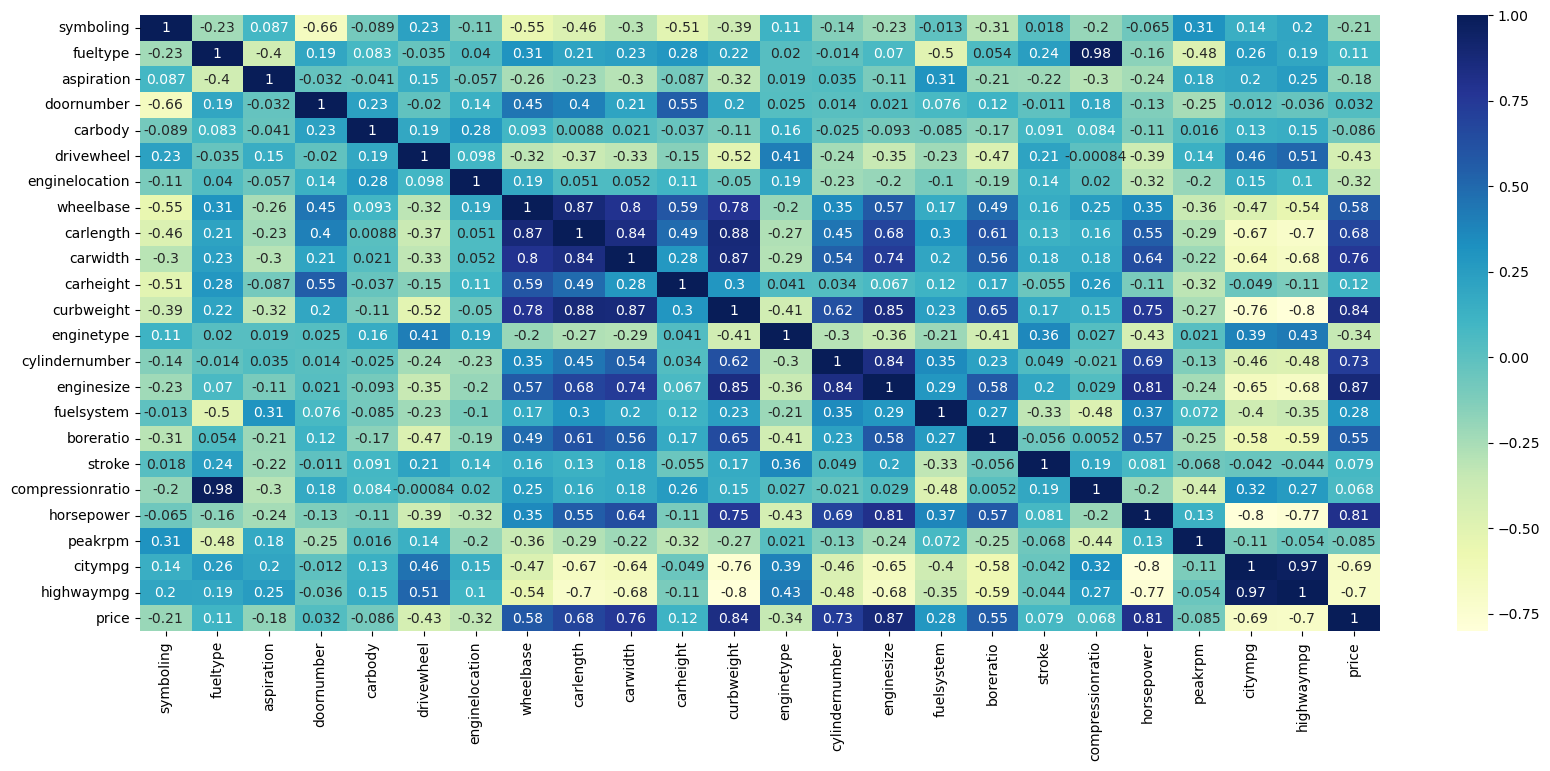

In [18]:
heatmap = sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
fig = plt.gcf()
fig.set_size_inches(20, 8)

In [19]:
data = data[['fueltype', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
pre = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'horsepower']
for i in pre:
    data[i] = ss.fit_transform(data[i].values.reshape(-1, 1))

C:\Users\Gokul\AppData\Local\Temp\ipykernel_12392\2815382638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = ss.fit_transform(data[i].values.reshape(-1, 1))
C:\Users\Gokul\AppData\Local\Temp\ipykernel_12392\2815382638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = ss.fit_transform(data[i].values.reshape(-1, 1))
C:\Users\Gokul\AppData\Local\Temp\ipykernel_12392\2815382638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [21]:
data

,fueltype,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,0,-1.690772,-0.426521,-0.844782,-2.020417,3,0.074449,94,0.519071,0.174483,13495.0
1,0,-1.690772,-0.426521,-0.844782,-2.020417,3,0.074449,94,0.519071,0.174483,16500.0
2,0,-0.708596,-0.231513,-0.190566,-0.543527,5,0.604046,94,-2.404880,1.264536,16500.0
3,0,0.173698,0.207256,0.136542,0.235942,3,-0.431076,94,-0.517266,-0.053668,13950.0
4,0,0.107110,0.207256,0.230001,0.235942,4,0.218885,94,-0.517266,0.275883,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,0,1.721873,1.198549,1.398245,0.728239,3,0.339248,94,1.666445,0.250533,16845.0
201,0,1.721873,1.198549,1.351515,0.728239,3,0.339248,94,1.666445,1.416637,19045.0
202,0,1.721873,1.198549,1.398245,0.728239,5,1.109571,94,0.926204,0.757535,21485.0
203,1,1.721873,1.198549,1.398245,0.728239,5,0.435538,20,-1.183483,0.047732,22470.0


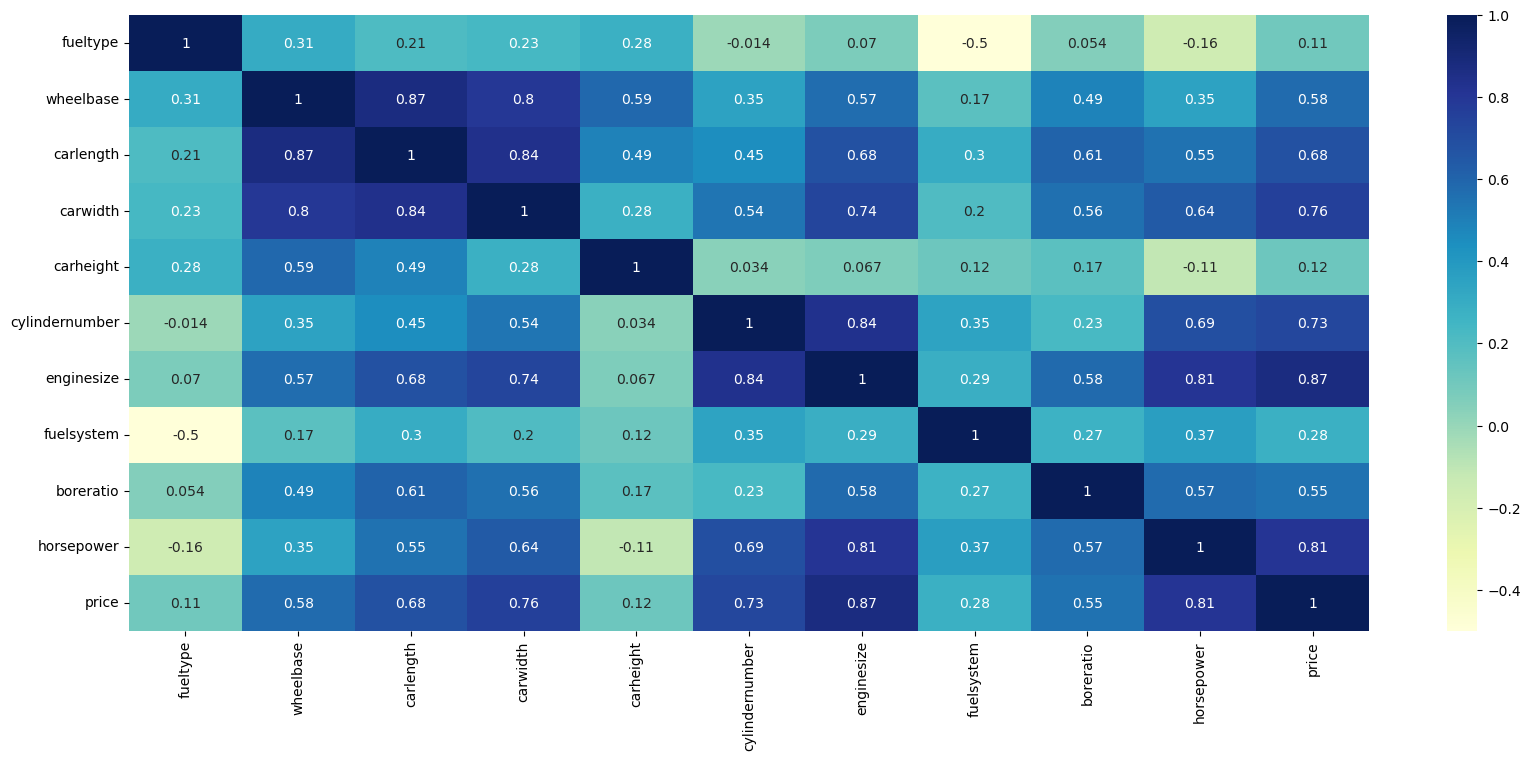

In [22]:
heatmap = sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
fig = plt.gcf()
fig.set_size_inches(20, 8)

In [23]:
x = data.drop(axis = 1, columns = "price")
y = data["price"]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=12, test_size=0.25)

In [25]:
f= [X_train, X_test, y_train, y_test]
for i in f:
    print(i.shape)

(153, 10)
(52, 10)
(153,)
(52,)


# Model Building

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
ln = LinearRegression()
lnm = ln.fit(X_train, y_train)
lnm.score(X_test, y_test)

0.6734906546744797

In [28]:
r = Ridge()
rm = r.fit(X_train, y_train)
rm.score(X_test, y_test)

0.6791806096781183

In [29]:
l = Lasso()
lm = l.fit(X_train, y_train)
lm.score(X_test, y_test)

0.6739926494421798

In [30]:
e = ElasticNet()
em = e.fit(X_train, y_train)
em.score(X_test, y_test)

0.6928462739155037

In [31]:
# Decision Tree
param_grid_dt = {'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# RandomForestRegressor
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# XGBRegressor
param_grid_xgb = {'n_estimators': [100, 200, 300],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'subsample': [0.8, 1.0],
                  'min_child_weight': [1, 3, 5]}

# regression models
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()
xgb_regressor = XGBRegressor()

# Hyperparameter Tuning
dt_grid_search = GridSearchCV(dt_regressor, param_grid_dt, cv=5)
rf_grid_search = GridSearchCV(rf_regressor, param_grid_rf, cv=5)
xgb_grid_search = GridSearchCV(xgb_regressor, param_grid_xgb, cv=5)
dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
xgb_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [33]:
dt_grid_search.score(X_test, y_test)

0.8799142040764101

In [34]:
rf_grid_search.score(X_test, y_test)

0.8710534704823473

In [35]:
xgb_grid_search.score(X_test, y_test)

0.8390224914785323

# Thank you 